# Polynomial Regression

### Import Libraries

In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline

### Create Dataset

In [9]:
X = 6 * np.random.rand(100, 1) - 3
y = 0.5 * X**2 + 1.5*X + 2 + np.random.randn(100, 1)
# Quadratic equation used - y=0.5x^2 + 1.5x + 2 with some noise or outliers

print(X.shape, y.shape)
print("X= \n",X[:5])
print(" y= \n", y[:5])

(100, 1) (100, 1)
X= 
 [[-0.89736256]
 [ 2.71304192]
 [ 1.52934096]
 [ 2.90644211]
 [-0.11892284]]
 y= 
 [[ 1.75764158]
 [ 8.33705719]
 [ 4.62230839]
 [10.69129342]
 [ 2.31342709]]


### Visualize data

Text(0, 0.5, 'y')

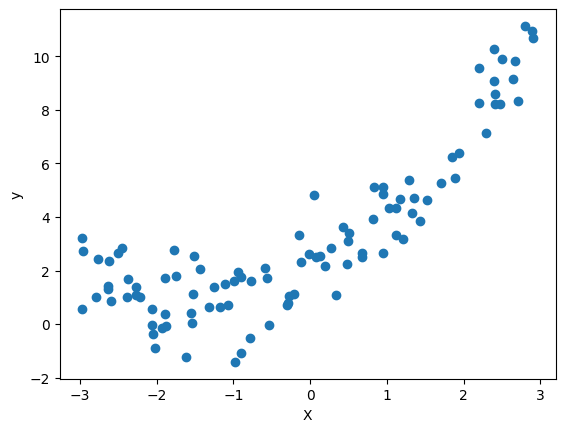

In [11]:
plt.scatter(X,y)
plt.xlabel("X")
plt.ylabel("y")

### Split the Data

In [15]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42) 

### Train Model

In [16]:
model_1 = LinearRegression()
model_1.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


### Make Prediction

In [17]:
y_pred = model_1.predict(X_test)

### Evaluate model

In [18]:
score=r2_score(y_test, y_pred)
print(score)

0.6319780247006557


### Visualize the model

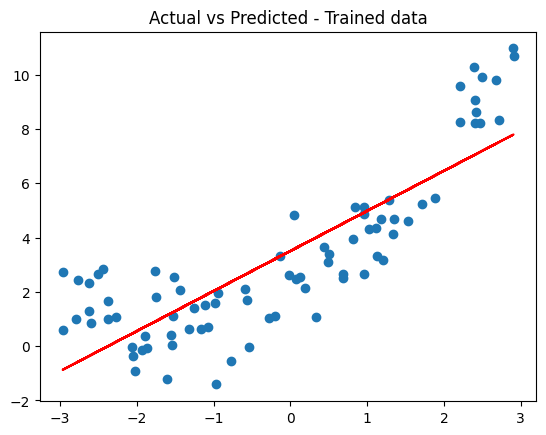

In [23]:
plt.scatter(X_train,y_train)
plt.plot(X_train,model_1.predict(X_train),color='red')
plt.title("Actual vs Predicted - Trained data")
plt.show()

Text(0.5, 1.0, 'Actual vs Predicted - Test data')

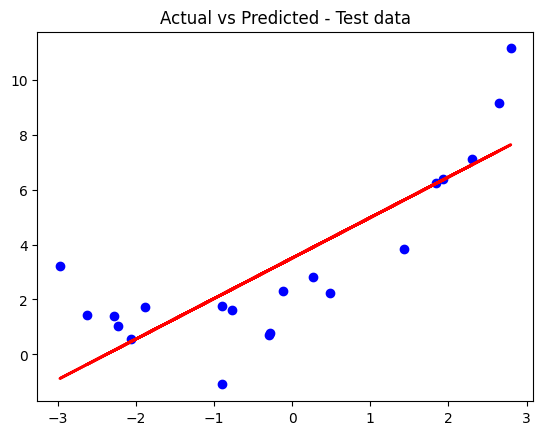

In [20]:
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted')
plt.title("Actual vs Predicted - Test data")

### Introducing Polynomial Features

In [86]:
poly=PolynomialFeatures(degree=2,include_bias=True)
X_train_poly=poly.fit_transform(X_train)
X_test_poly=poly.transform(X_test)

In [87]:
X_train_poly[:6]

array([[ 1.        ,  1.70902752,  2.92077505],
       [ 1.        ,  1.02824983,  1.05729771],
       [ 1.        ,  0.49335843,  0.24340254],
       [ 1.        , -0.98743952,  0.97503681],
       [ 1.        , -1.76711071,  3.12268025],
       [ 1.        ,  0.43213145,  0.18673759]])

In [88]:
X_test_poly[:6]

array([[ 1.        , -2.22005925,  4.92866305],
       [ 1.        , -0.77015376,  0.59313681],
       [ 1.        , -0.90129312,  0.81232929],
       [ 1.        ,  0.48611185,  0.23630473],
       [ 1.        ,  1.43648788,  2.06349743],
       [ 1.        , -2.06322424,  4.25689425]])

### Train model with poly data

In [89]:
model_2 = LinearRegression()
model_2.fit(X_train_poly, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


### Make Prediction

In [90]:
y_pred = model_2.predict(X_test_poly)
y_pred[:6]

array([[1.05471545],
       [1.10967355],
       [1.01738682],
       [2.87373503],
       [5.26707791],
       [0.95827013]])

### Evaluate

In [91]:
score=r2_score(y_test, y_pred)
print(score)

0.9226025186519646


In [92]:
print(model_2.coef_)
print(model_2.intercept_)

[[0.         1.54761917 0.50488529]]
[2.00211223]


### Visualize the model

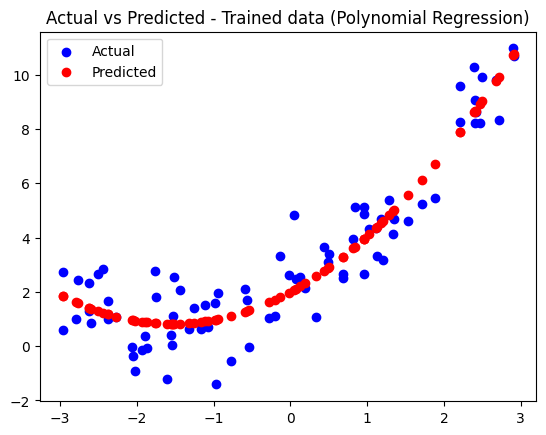

In [96]:
plt.scatter(X_train,y_train,color='blue',label='Actual')
plt.scatter(X_train,model_2.predict(X_train_poly),color='red',label='Predicted')
plt.title("Actual vs Predicted - Trained data (Polynomial Regression)")
plt.legend()
plt.show()




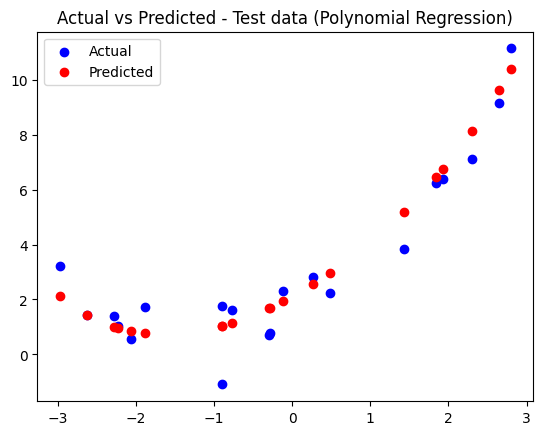

In [53]:
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.scatter(X_test, y_pred, color='red', label='Predicted')
plt.title("Actual vs Predicted - Test data (Polynomial Regression)")
plt.legend()
plt.show()

### Increasing Polynomial Degree

In [74]:
poly=PolynomialFeatures(degree=4,include_bias=True)
X_train_poly=poly.fit_transform(X_train)
X_test_poly=poly.transform(X_test)
X_train_poly[:6]

array([[ 1.        ,  1.70902752,  2.92077505,  4.99168493,  8.5309269 ],
       [ 1.        ,  1.02824983,  1.05729771,  1.08716619,  1.11787845],
       [ 1.        ,  0.49335843,  0.24340254,  0.12008469,  0.0592448 ],
       [ 1.        , -0.98743952,  0.97503681, -0.96278989,  0.95069679],
       [ 1.        , -1.76711071,  3.12268025, -5.51812171,  9.75113197],
       [ 1.        ,  0.43213145,  0.18673759,  0.08069518,  0.03487093]])

In [75]:
model_3=LinearRegression()
model_3.fit(X_train_poly, y_train)
y_pred= model_3.predict(X_test_poly)
score=r2_score(y_test, y_pred)
print(score)


0.9270858061449622


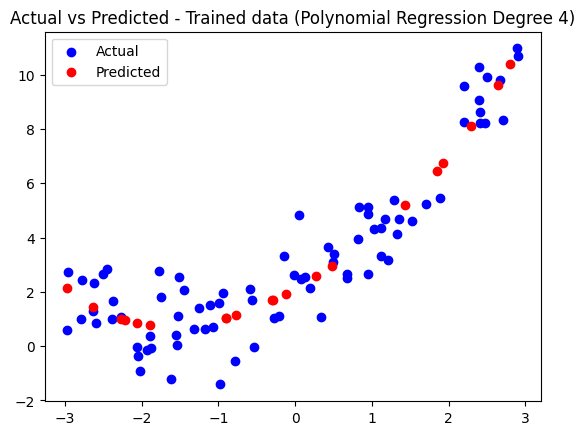

In [81]:
plt.scatter(X_train, y_train, color='blue', label='Actual')
plt.scatter(X_test, y_pred, color='red', label='Predicted')
plt.title("Actual vs Predicted - Trained data (Polynomial Regression Degree 4)")
plt.legend()
plt.show()

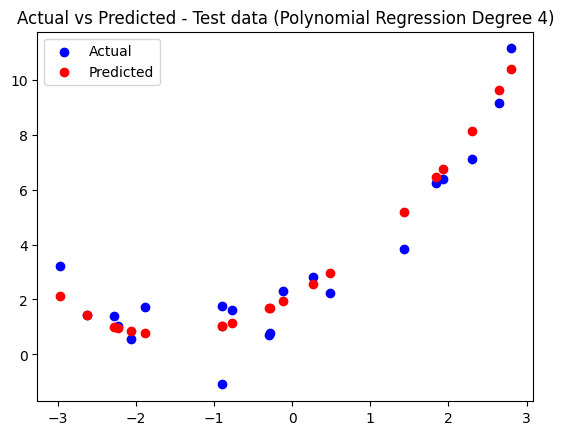

In [78]:
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.scatter(X_test, y_pred, color='red', label='Predicted')
plt.title("Actual vs Predicted - Test data (Polynomial Regression Degree 4)")   
plt.legend()
plt.show()

In [82]:
# Prediction of new dataset
X_new_test=np.linspace(-3,3,200).reshape(200,1)
X_new_test_poly=poly.transform(X_new_test)
X_new_test_poly[:6]

array([[  1.        ,  -3.        ,   9.        , -27.        ,
         81.        ],
       [  1.        ,  -2.96984925,   8.82000455, -26.19408385,
         77.79248018],
       [  1.        ,  -2.93969849,   8.64182723, -25.40436647,
         74.68117781],
       [  1.        ,  -2.90954774,   8.46546804, -24.6306834 ,
         71.6641492 ],
       [  1.        ,  -2.87939698,   8.290927  , -23.8728702 ,
         68.73947047],
       [  1.        ,  -2.84924623,   8.11820409, -23.1307624 ,
         65.90523758]])

In [83]:
y_new_test=model_3.predict(X_new_test_poly)
print(y_new_test[:6])

[[2.19930622]
 [2.1269193 ]
 [2.05671856]
 [1.98867404]
 [1.92275608]
 [1.85893531]]


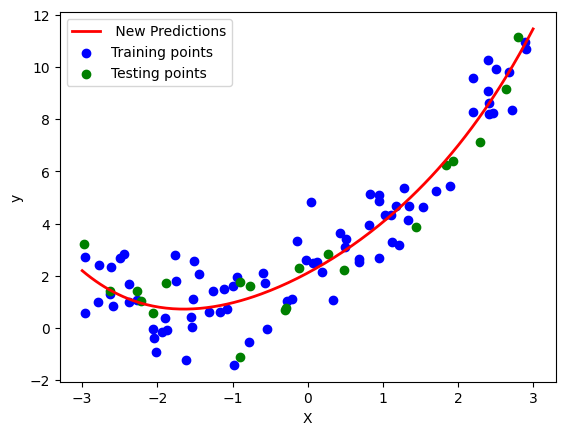

In [85]:
plt.plot(X_new_test, y_new_test, "r-", linewidth=2, label=" New Predictions")
# plt.plot(X_train, y_train, "b.",label='Training points')
# plt.plot(X_test, y_test, "g.",label='Testing points')
plt.scatter(X_train, y_train, color='blue', label='Training points')
plt.scatter(X_test, y_test, color='green', label='Testing points')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

# Pipeline Concept


In [110]:
def poly_regression(degree):
    X_new=np.linspace(-3,3,200).reshape(200,1)
    poly_features=PolynomialFeatures(degree=degree,include_bias=True)
    lin_reg=LinearRegression()
    poly_regression=Pipeline([
        ('poly_features', poly_features),
        ('lin_reg', lin_reg)
    ])
    poly_regression.fit(X_train, y_train) #add Poly features and fit in linear regression 
    y_pred_new=poly_regression.predict(X_new)

    #plotting prediction line
    plt.plot(X_new,y_pred_new,'r',label="Degree "+str(degree),linewidth=2)
    plt.plot(X_train, y_train, "b.",linewidth=3,label='Training points')
    plt.plot(X_test,y_test,"g.",linewidth=3,label='Testing points')
    plt.legend(loc="upper left")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.axis([-3,3,0,13])
    plt.title("Polynomial Regression with degree "+str(degree))
    score=r2_score(y_test, poly_regression.predict(X_test))
    print("R2 score for degree ",degree," is: ",score)
    plt.show()

R2 score for degree  6  is:  0.9147534261135305


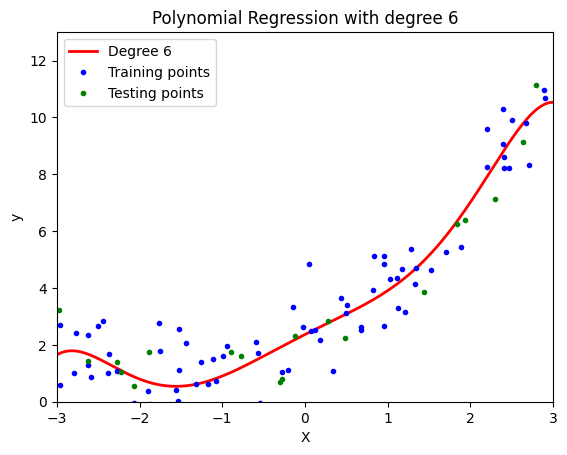

In [120]:
poly_regression(6)